#Analisi preliminare

- carico il dataframe
- rinomino le features
- mostro le informazioni preliminari ottenute tramite info() e describe()
- conto il numero di valori nulli
- mostro la distribuzione delle classi
- rappresento gli outliner e la scala delel features tramite dei box plot


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
dtypes: float64(4)
memory usage: 43.0 KB
None
          variance     skewness     curtosis      entropy
count  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657
std       2.842763     5.869047     4.310030     2.101013
min      -7.042100   -13.773100    -5.286100    -8.548200
25%      -1.773000    -1.708200    -1.574975    -2.413450
50%       0.496180     2.319650     0.616630    -0.586650
75%       2.821475     6.814625     3.179250     0.394810
max       6.824800    12.951600    17.927400     2.449500

--- Controllo dei valori nulli ---
variance    0
skewness    0
curtosis    0
entropy     0


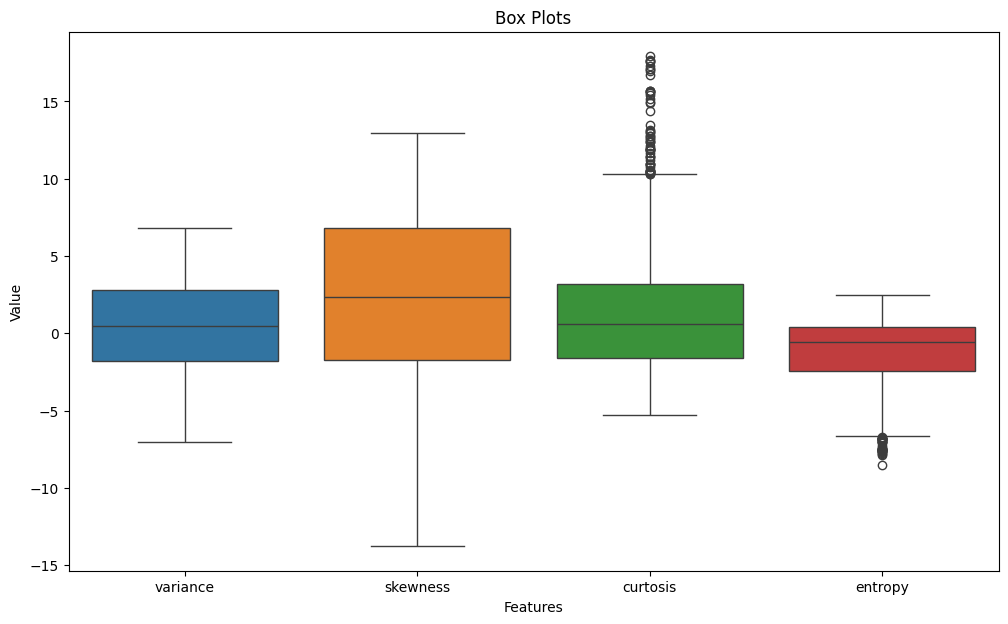

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml

data = fetch_openml(name ='banknote-authentication')
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")
new_column_names = {
    'V1': 'variance',
    'V2': 'skewness',
    'V3': 'curtosis',
    'V4': 'entropy'
}
X = X.rename(columns=new_column_names)

# Display information about the DataFrame
print(X.info())

# Display descriptive statistics of the DataFrame
print(X.describe())

print("\n--- Controllo dei valori nulli ---")
print(X.isnull().sum())

print("\n--- Distribuzione delle classi ---")
print(y.value_counts())

print("\n--- Distribuzione percentuale ---")
print(y.value_counts(normalize=True))

print("\n--- Outliners ---")
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.boxplot(data=X)

plt.title('Box Plots')
plt.ylabel('Value')
plt.xlabel('Features')
plt.show()



Basandosi su un'analisi preliminare si osserva che :

###Aspettative sul Preprocessing
- Non sono presenti dati mancanti da gestire nel preprocessing.

- Dato che X.describe() e i boxplot ci mostrano che le features hanno scale diverse, il passaggio più critico prima dell'addestramento è la standardizzazione.
Bisogna usare StandardScaler perchè modelli come Logistic Regression, SVM, KNN e Reti Neurali performano molto male (o convergono lentamente) se le features non sono standardizzate (media 0, deviazione standard 1). La feature con il range più ampio (es. 'variance') dominerebbe ingiustamente il modello.


###Metriche di valutazione
- Dato che il dataset è bilanciato (come visto dall'analisi di y), l'Accuracy (precisione globale) è una metrica valida e affidabile.

- Possiamo comunque usare (e dovremmo sempre) Precision, Recall e F1-Score per un'analisi più completa, ma l'accuracy da sola ci darà già un'ottima idea della performance.

###Performance Attesa

- I dati sono "puliti" (no missing values), numerici, e il problema è ben definito.

- Ci aspettiamo performance eccellenti. Questo è considerato un dataset "facile". Con un modello robusto (come un SVM con kernel RBF, un Random Forest o un Gradient Boosting) e dopo la corretta standardizzazione, dovresti aspettarti un'accuracy e un F1-Score molto alti, probabilmente superiori al 98-99% sulla test set.

---


#Preprocessing

- Standardizzazione

--- Scaled Data (Head) ---
   variance  skewness  curtosis   entropy
0  1.121806  1.149455 -0.975970  0.354561
1  1.447066  1.064453 -0.895036 -0.128767
2  1.207810 -0.777352  0.122218  0.618073
3  1.063742  1.295478 -1.255397 -1.144029
4 -0.036772 -1.087038  0.736730  0.096587

--- Scaled Data (Describe) ---
           variance      skewness      curtosis       entropy
count  1.372000e+03  1.372000e+03  1.372000e+03  1.372000e+03
mean  -8.286213e-17 -4.143106e-17 -6.214659e-17 -1.812609e-17
std    1.000365e+00  1.000365e+00  1.000365e+00  1.000365e+00
min   -2.630737e+00 -2.675252e+00 -1.551303e+00 -3.502703e+00
25%   -7.765474e-01 -6.188189e-01 -6.899455e-01 -5.817379e-01
50%    2.197423e-02  6.771828e-02 -1.812706e-01  2.880644e-01
75%    8.402427e-01  8.338757e-01  4.135174e-01  7.553713e-01
max    2.249008e+00  1.879908e+00  3.836586e+00  1.733680e+00

--- Outliners after scale ---
           variance      skewness      curtosis       entropy
count  1.372000e+03  1.372000e+03  1.3

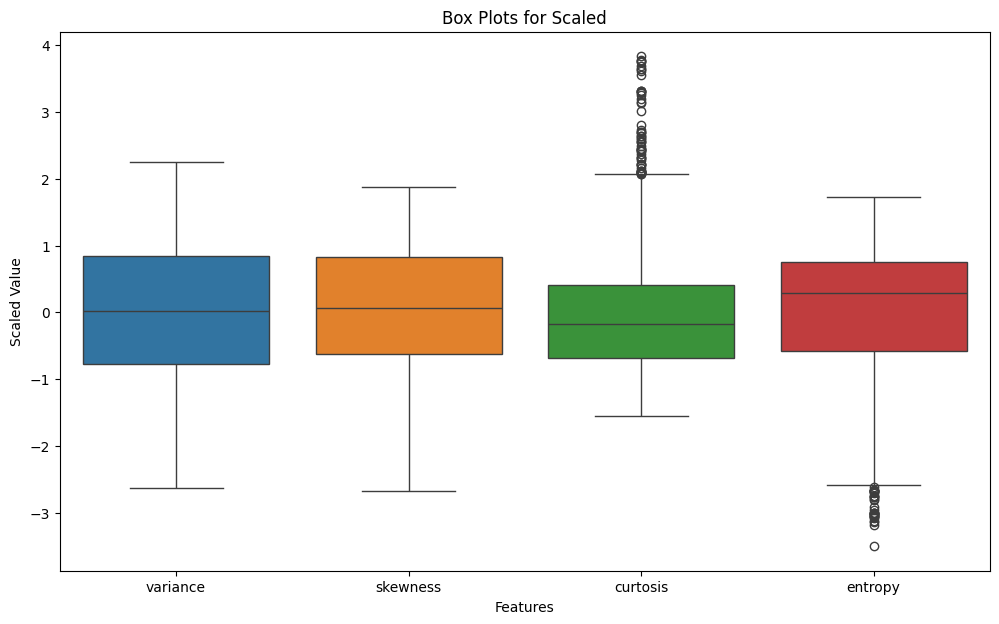

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("--- Scaled Data (Head) ---")
print(X_scaled_df.head())

print("\n--- Scaled Data (Describe) ---")
print(X_scaled_df.describe())

plt.figure(figsize=(12, 7))
sns.boxplot(data=X_scaled_df)

print("\n--- Outliners after scale ---")
print(X_scaled_df.describe())
plt.title('Box Plots for Scaled')
plt.ylabel('Scaled Value')
plt.xlabel('Features')
plt.show()

- Plotting della distribuzione delle features

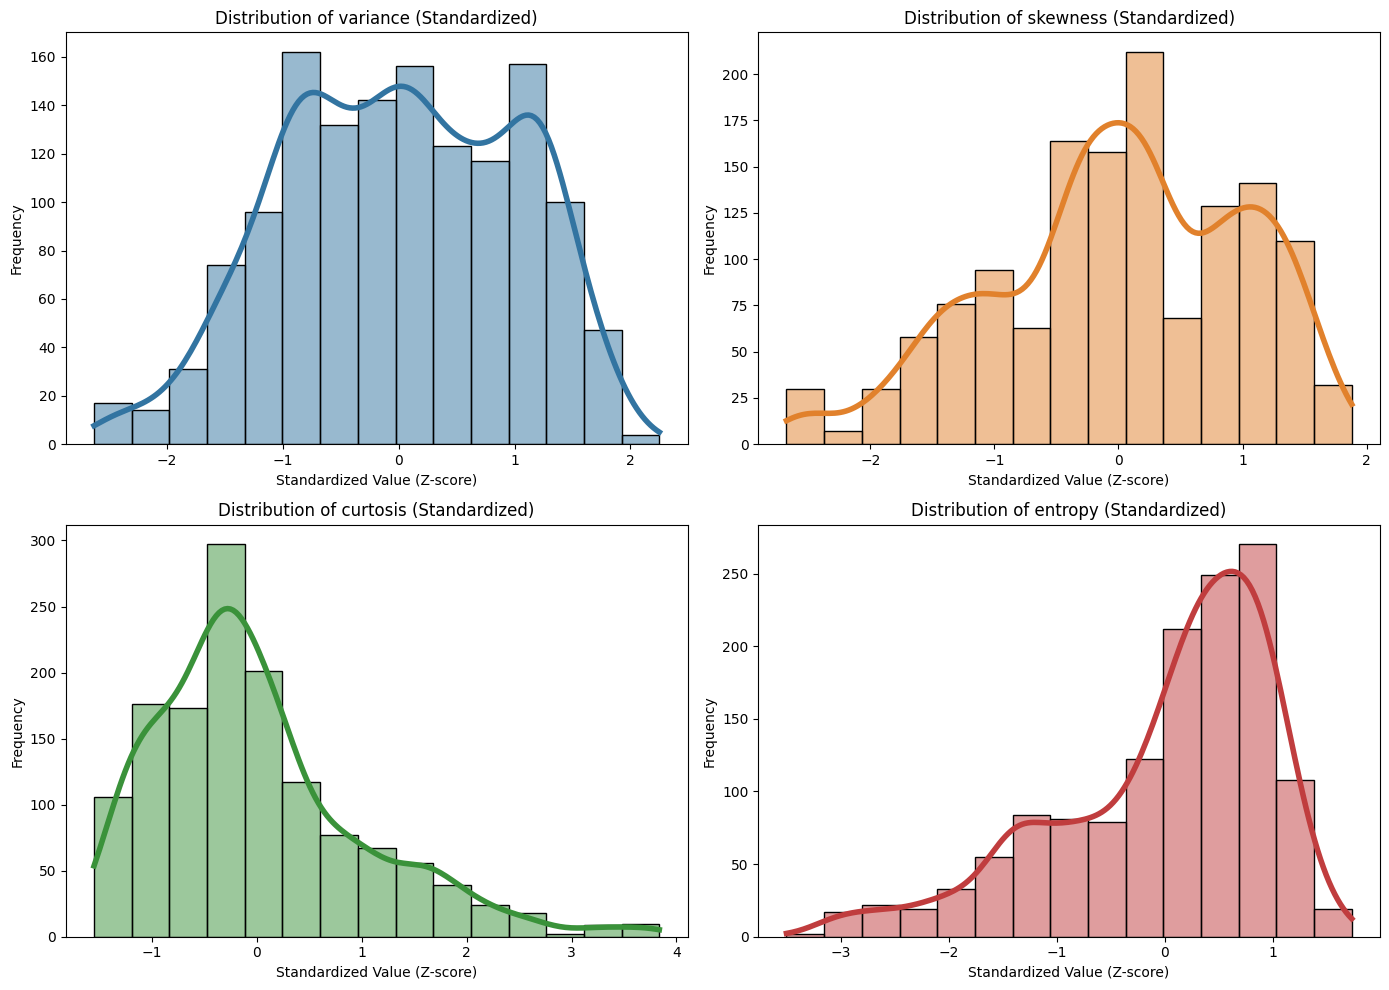

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()
features = X_scaled_df.columns

colors = ['#3274a1', '#e1812c', '#3a923a', '#c03d3e']
for i, feature in enumerate(features):
    sns.histplot(X_scaled_df[feature], ax=axes[i], kde=True, bins=15, color=colors[i], line_kws={'linewidth': 4})
    axes[i].set_title(f'Distribution of {feature} (Standardized)')
    axes[i].set_xlabel('Standardized Value (Z-score)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Osservando questi 4 grafici emerge:

- **Forma**: Le distribuzioni della feature variance ha una distrubuzione che si avvicina a quella normale, mentre le altre sono più assimetriche;

- **Bimodalità**: le feature variance e skewness, mostrano una distribuzione bimodale (con due "picchi"). Questo è un indizio sul fatto che quella feature separa bene le due classi.

- **Conferma Outlier**: Le "code" confermano la presenza di outlier, già identificati tramite i box plot.